<a href="https://colab.research.google.com/github/deNzik3/data_analytics_projects/blob/main/laptop_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About dataset
**In this notebook, I will build a model that will predict the price of a laptop depending on its components. I will first clean and prepare the information, then I will visualize the data and then I will build the model**

#Importing libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#Loading data

In [3]:
df = pd.read_csv("/content/laptop_data.csv", index_col = 0)

In [4]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


#Data cleaning and preparing

**Let's find out some insights about dataset**

In [5]:
def summary(df):
  print(f'data shape: {df.shape}')
  summ = pd.DataFrame(df.dtypes, columns=['data type'])
  summ['#missing'] = df.isnull().sum().values * 100
  summ['%missing'] = df.isnull().sum().values / len(df)
  summ['#unique'] = df.nunique().values
  summ['#duplicates'] = df.duplicated().count()
  desc = pd.DataFrame(df.describe(include='all').transpose())
  summ['min'] = desc['min'].values
  summ['max'] = desc['max'].values
  summ['first value'] = df.loc[0].values
  summ['second value'] = df.loc[1].values
  summ['third value'] = df.loc[2].values

  return summ

In [6]:
summary(df)

data shape: (1303, 11)


,data type,#missing,%missing,#unique,#duplicates,min,max,first value,second value,third value
Company,object,0,0.0,19,1303,NaN,NaN,Apple,Apple,HP
TypeName,object,0,0.0,6,1303,NaN,NaN,Ultrabook,Ultrabook,Notebook
Inches,float64,0,0.0,18,1303,10.1,18.4,13.3,13.3,15.6
ScreenResolution,object,0,0.0,40,1303,NaN,NaN,IPS Panel Retina Display 2560x1600,1440x900,Full HD 1920x1080
Cpu,object,0,0.0,118,1303,NaN,NaN,Intel Core i5 2.3GHz,Intel Core i5 1.8GHz,Intel Core i5 7200U 2.5GHz
Ram,object,0,0.0,9,1303,NaN,NaN,8GB,8GB,8GB
Memory,object,0,0.0,39,1303,NaN,NaN,128GB SSD,128GB Flash Storage,256GB SSD
Gpu,object,0,0.0,110,1303,NaN,NaN,Intel Iris Plus Graphics 640,Intel HD Graphics 6000,Intel HD Graphics 620
OpSys,object,0,0.0,9,1303,NaN,NaN,macOS,macOS,No OS
Weight,object,0,0.0,179,1303,NaN,NaN,1.37kg,1.34kg,1.86kg


**We have a completely clean dataset!**

**Let's prepare out data for ML**

In [7]:
df.duplicated().sum()   #finding duplicated data

29

In [9]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


**Remove GB and kg from rows**

In [10]:
df['Ram'] = df['Ram'].str.replace('GB','')       #
df['Weight'] = df['Weight'].str.replace('kg','')

**Let's make the column names lowercase**

In [11]:
df.columns = df.columns.str.lower()

**Let's change the data type**

In [13]:
df['ram'] = df['ram'].astype('int32')
df['weight'] = df['weight'].astype('float32')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1303 non-null   object 
 1   typename          1303 non-null   object 
 2   inches            1303 non-null   float64
 3   screenresolution  1303 non-null   object 
 4   cpu               1303 non-null   object 
 5   ram               1303 non-null   int32  
 6   memory            1303 non-null   object 
 7   gpu               1303 non-null   object 
 8   opsys             1303 non-null   object 
 9   weight            1303 non-null   float32
 10  price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 144.3+ KB


In [38]:
df['screenresolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

**Let's make a column where 1 if there is "Touchscreen" and 0 if not**

In [39]:
df['touchscreen'] = df["screenresolution"].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [43]:
df['ips'] = df['screenresolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [47]:
new = df['screenresolution'].str.split('x',n=1,expand=True)
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [48]:
df["x_res"] = new[0]
df["y_res"] = new[1]

In [49]:
df.head()

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,touchscreen,ips,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


**Take the last element of the list**

In [52]:
df["x_res"] = df.x_res.apply(lambda x: x.split(' ')[-1:])

**Let's open the list column**

In [54]:
df["x_res"] = df.x_res.apply(lambda x: "".join(x))

In [55]:
df['x_res'] = df['x_res'].astype('int')
df['y_res'] = df['y_res'].astype('int')

In [57]:
df['ppi'] = (((df['x_res']**2) + (df['y_res']**2))**0.5/df['inches']).astype('float')

In [58]:
del df["screenresolution"]

In [60]:
df.head()

,company,typename,inches,cpu,ram,memory,gpu,opsys,weight,price,touchscreen,ips,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


**Remove unnecessary columns**

In [62]:
df = df.drop(["x_res","y_res","inches"], axis = 1)

In [63]:
df["cpu"].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: cpu, Length: 118, dtype: int64

In [67]:
df["cpu_name"] = df.cpu.apply(lambda x:" ".join(x.split()[0:3]))

**Let's create a function that distributes information to specific groups**

In [68]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [69]:
df["cpu_brand"] = df['cpu_name'].apply(fetch_processor)

In [70]:
df.head()

,company,typename,cpu,ram,memory,gpu,opsys,weight,price,touchscreen,ips,ppi,cpu_name,cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


**Let's make a quick visualization**

<Axes: >

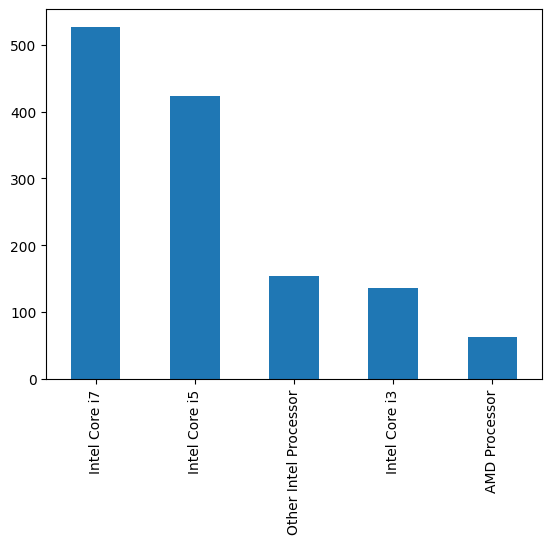

In [72]:
df['cpu_brand'].value_counts().plot(kind='bar')

In [74]:
df = df.drop(["cpu","cpu_name"],axis = 1)

In [76]:
df['memory'] = df['memory'].astype(str).replace('\.0', '', regex=True)
df["memory"] = df["memory"].str.replace('GB', '')
df["memory"] = df["memory"].str.replace('TB', '000')
new = df["memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

<ipython-input-76-233fd024a485>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
<ipython-input-76-233fd024a485>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [77]:
df.head()

,company,typename,ram,memory,gpu,opsys,weight,price,touchscreen,ips,ppi,cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [80]:
df = df.drop('memory',axis = 1)

In [85]:
df['gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: gpu, Length: 110, dtype: int64

In [86]:
df['gpu_brand'] = df['gpu'].apply(lambda x:x.split()[0])

In [87]:
df['gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: gpu_brand, dtype: int64

In [88]:
df = df[df['gpu_brand'] != 'ARM']

In [90]:
df['opsys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: opsys, dtype: int64

**Similar function for grouping**

In [91]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [94]:
df['os'] = df['opsys'].apply(cat_os).copy()

In [95]:
df.head()

,company,typename,ram,gpu,opsys,weight,price,touchscreen,ips,ppi,cpu_brand,HDD,SSD,gpu_brand,os
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [96]:
df.drop(columns=['opsys'],inplace=True)

#Data visualization for better understanding

<ipython-input-17-e909045b7e6b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], color = 'orange')


<Axes: xlabel='price', ylabel='Density'>

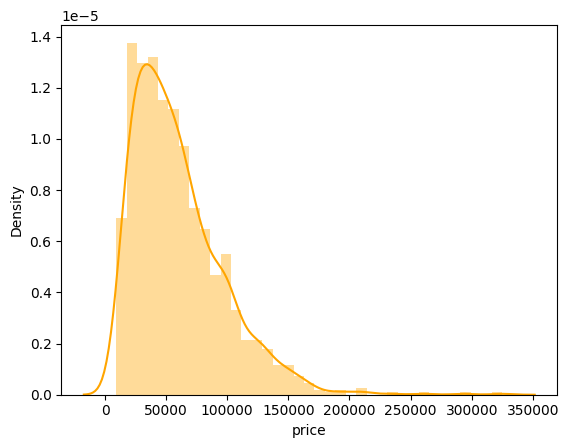

In [17]:
sns.distplot(df['price'], color = 'orange')


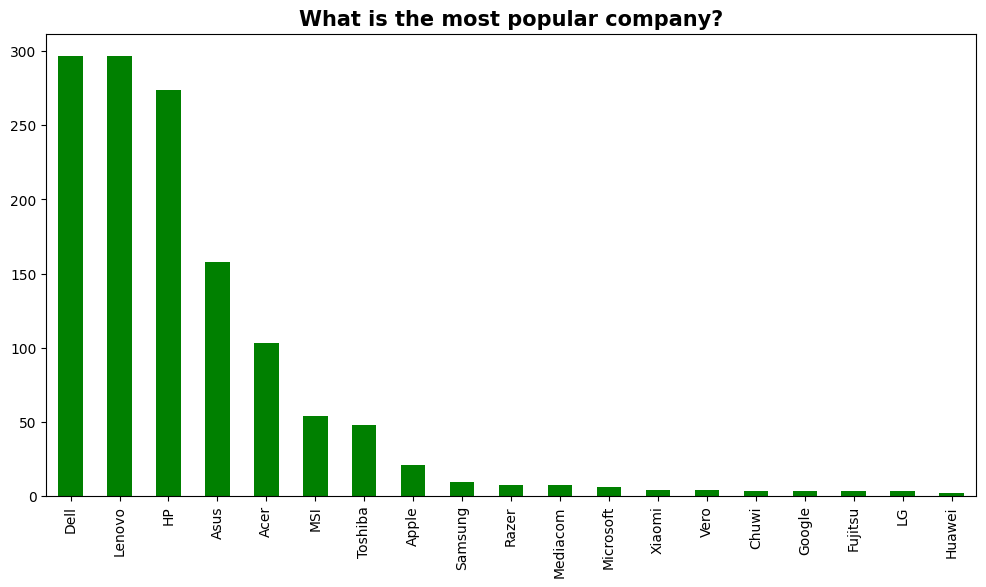

In [21]:
plt.figure(figsize = (12,6))
plt.title("What is the most popular company?",weight = 'heavy',size = 15)


df['company'].value_counts().plot(kind='bar',color = 'green')
plt.show()

In [27]:
data = df[['company','price']].sort_values(by = 'price',ascending = False).copy()

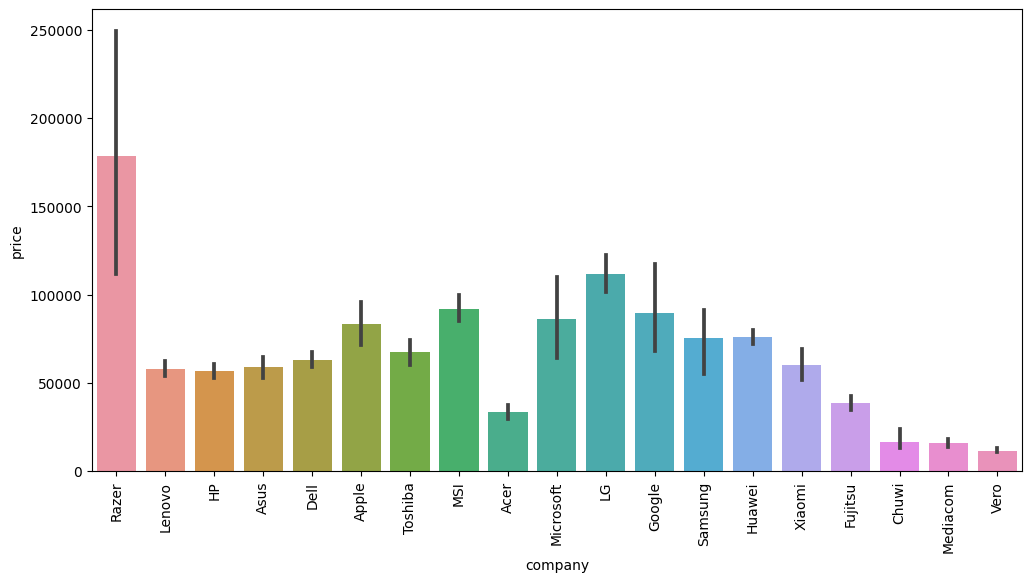

In [30]:
plt.figure(figsize = (12,6))
sns.barplot(data = data, x=data['company'],y=data['price'])
plt.xticks(rotation='vertical')
plt.show()

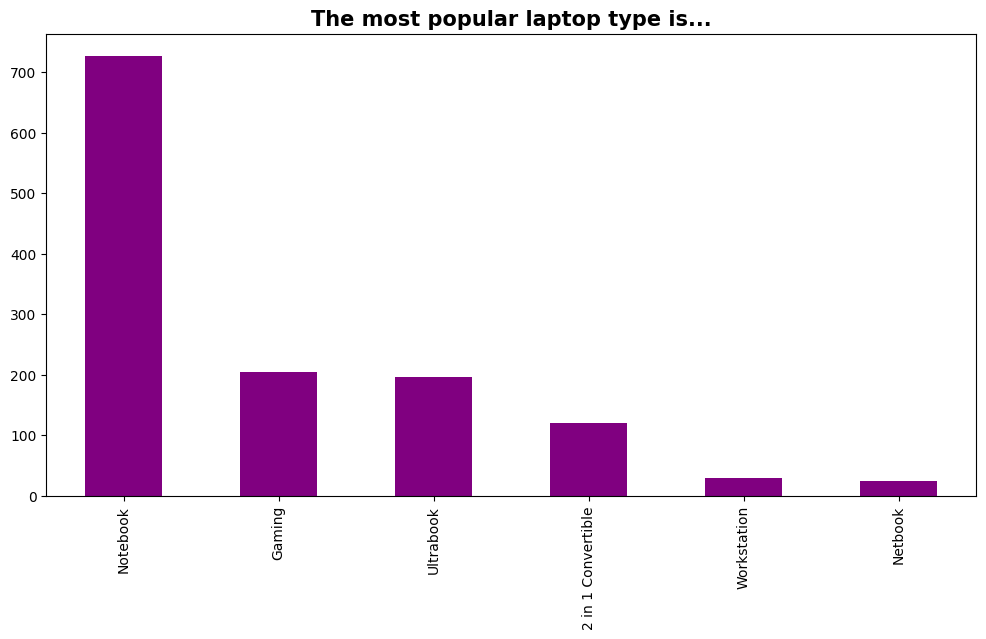

In [32]:
plt.figure(figsize = (12,6))
plt.title("The most popular laptop type is...",weight = 'heavy',size = 15)
df['typename'].value_counts().plot(kind='bar',color = 'purple')
plt.show()

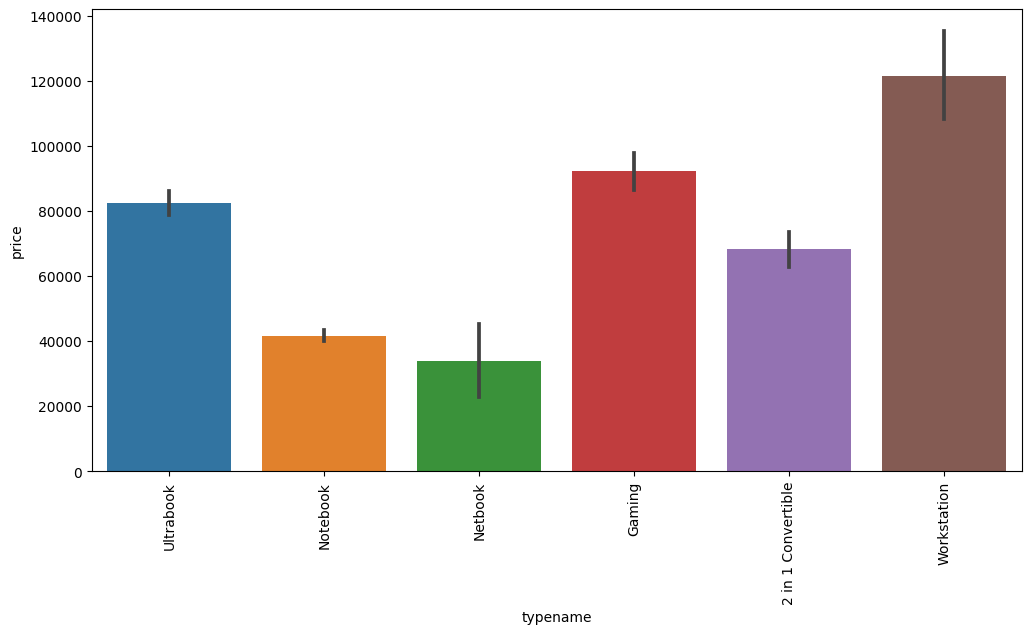

In [34]:
plt.figure(figsize = (12,6))
sns.barplot(x=df['typename'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-36-df9966f2b178>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['inches'])


<Axes: xlabel='inches', ylabel='Density'>

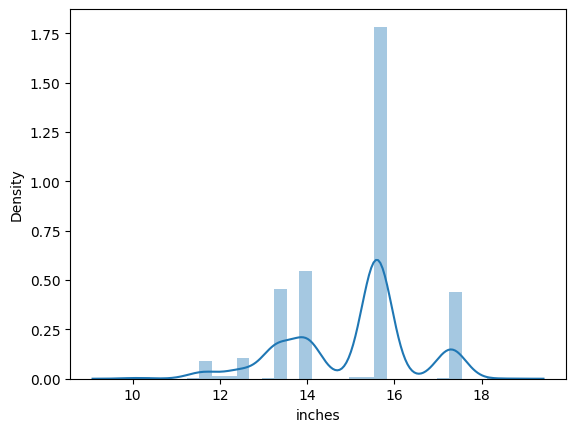

In [36]:
sns.distplot(df['inches'])

<Axes: xlabel='inches', ylabel='price'>

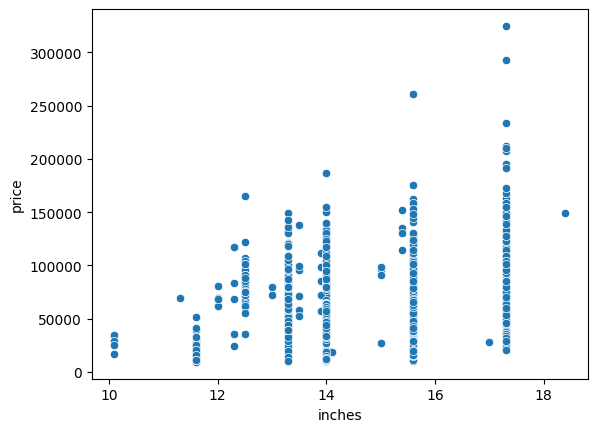

In [37]:
sns.scatterplot(x=df['inches'],y=df['price'])

<Axes: >

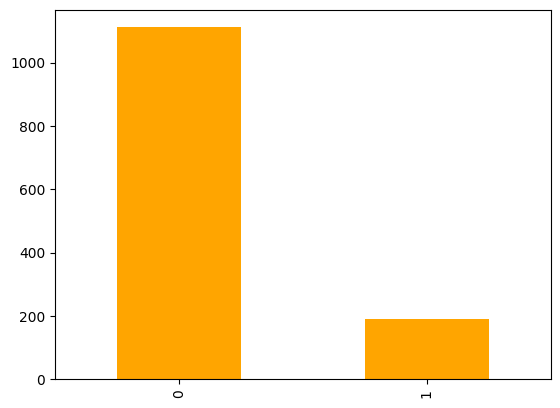

In [41]:
df['touchscreen'].value_counts().plot(kind='bar',color = 'orange')

<Axes: xlabel='touchscreen', ylabel='price'>

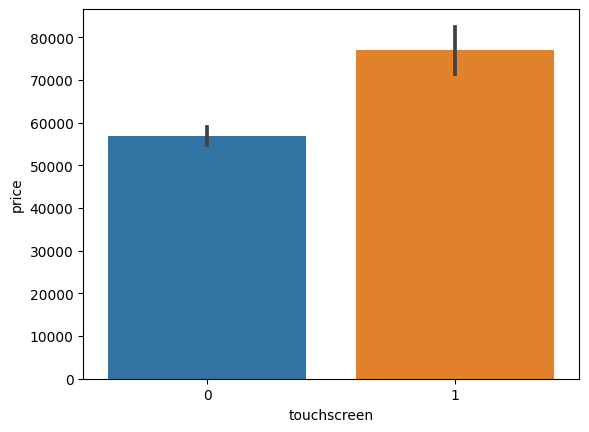

In [42]:
sns.barplot(x=df['touchscreen'],y=df['price'])

<Axes: >

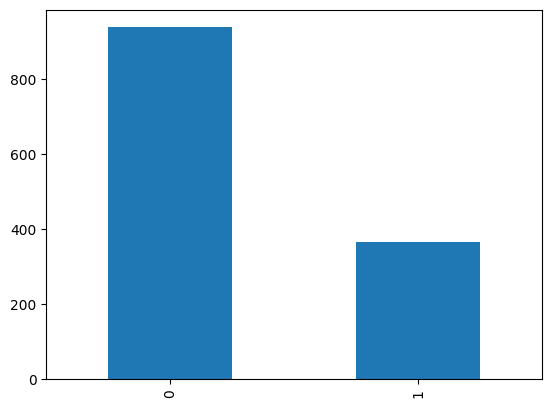

In [44]:
df['ips'].value_counts().plot(kind='bar')

<Axes: xlabel='ips', ylabel='price'>

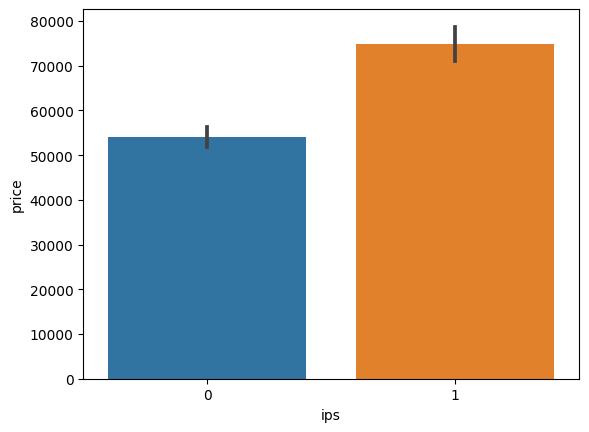

In [45]:
sns.barplot(x=df['ips'],y=df['price'])

**How many GB of RAM are sold most often**

<Axes: >

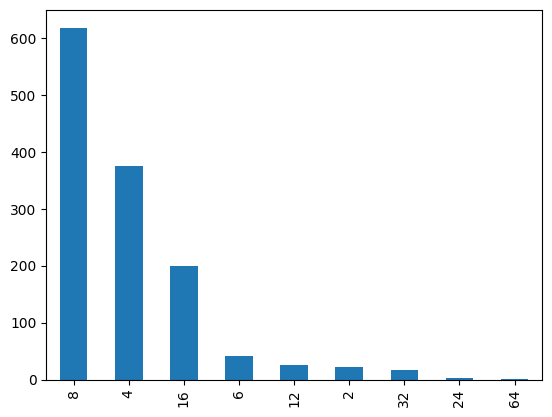

In [75]:
df['ram'].value_counts().plot(kind='bar')

#What affects the price of a laptop?

In [81]:
df.corr()['price']

<ipython-input-81-cbe57b8e6d9c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


ram              0.743007
weight           0.210370
price            1.000000
touchscreen      0.191226
ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: price, dtype: float64

<ipython-input-98-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

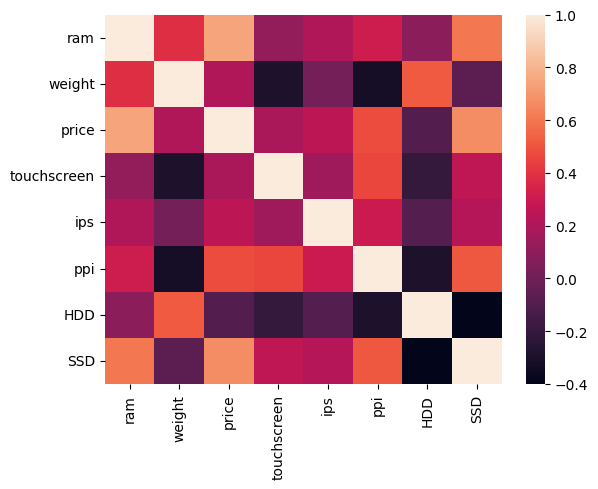

In [98]:
sns.heatmap(df.corr())

In [83]:
df = df.drop(["Flash_Storage","Hybrid"],axis = 1)

<Axes: xlabel='weight', ylabel='price'>

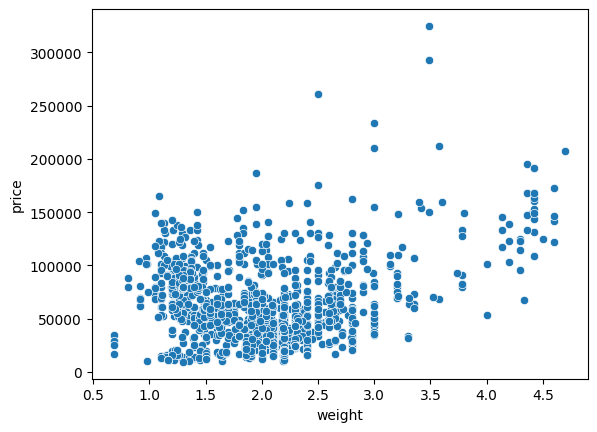

In [97]:
sns.scatterplot(x=df['weight'],y=df['price'])

**As we can see, the graph looks like a linear relationship**

In [109]:
df.head()

,company,typename,ram,weight,price,touchscreen,ips,ppi,cpu_brand,HDD,SSD,gpu_brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [108]:
df.drop(columns = "gpu", inplace = True)

In [111]:
df.cpu_brand.value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             62
Name: cpu_brand, dtype: int64

In [112]:
df.gpu_brand.value_counts()

Intel     722
Nvidia    400
AMD       180
Name: gpu_brand, dtype: int64

**Data normalization**

<ipython-input-99-753ce9645879>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['price']))


<Axes: xlabel='price', ylabel='Density'>

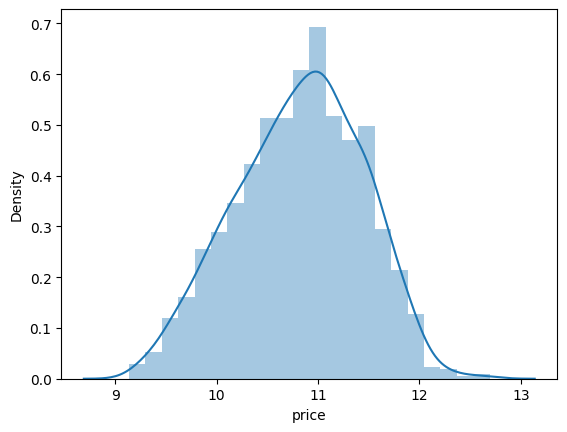

In [99]:
sns.distplot(np.log(df['price']))

**Feature enginiring**

In [129]:
X = df.drop(columns=['price'])
y = np.log(df['price'])

#Importing libraries for models

In [102]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [104]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [105]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [126]:
lr = LinearRegression()

#Linear Regression

In [121]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("=" * 20)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print("Train score", pipe.score(X_train,y_train))
print("Test score", pipe.score(X_test,y_test))
print("Final score", pipe.score(X,y))
print("=" * 20)

R2 score 0.792538326179777
MAE 0.2137307672356255
Train score 0.83652331352865
Test score 0.792538326179777
Final score 0.8303973735934451


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#Rigde regression

In [135]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("=" * 20)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print("Train score", pipe.score(X_train,y_train))
print("Test score", pipe.score(X_test,y_test))
print("Final score", pipe.score(X,y))
print("=" * 20)

R2 score 0.9234630515567919
MAE 0.15660036088941812
Train score 0.821417113431156
Test score 0.9234630515567919
Final score 0.8232656410636503


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#Lasso regression

In [137]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("=" * 20)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print("Train score", pipe.score(X_train,y_train))
print("Test score", pipe.score(X_test,y_test))
print("Final score", pipe.score(X,y))
print("=" * 20)

R2 score 0.9178182627877084
MAE 0.16681592396771144
Train score 0.8213936919612246
Test score 0.9178182627877084
Final score 0.8231436511771886


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#KNN

In [138]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("=" * 20)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print("Train score", pipe.score(X_train,y_train))
print("Test score", pipe.score(X_test,y_test))
print("Final score", pipe.score(X,y))
print("=" * 20)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.9330791240526278
MAE 0.17413376685397694
Train score 0.9055283969567107
Test score 0.9330791240526278
Final score 0.9062536590517211


#Decision tree

In [139]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("=" * 20)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print("Train score", pipe.score(X_train,y_train))
print("Test score", pipe.score(X_test,y_test))
print("Final score", pipe.score(X,y))
print("=" * 20)

R2 score 0.9333622367196042
MAE 0.1486313906072326
Train score 0.9112569895479009
Test score 0.9333622367196042
Final score 0.9116739715386523


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
